In [1]:
#!/usr/bin/env python
# coding: utf-8

!pip install -q pandas
!pip install -q matplotlib
!pip install -q plotly
!pip install -q ipywidgets
!pip install -q neuralprophet
!pip install -q jupyterlab
!pip install -q psutil

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from neuralprophet import NeuralProphet, set_log_level

In [2]:
# Load the dataset from the CSV file using pandas
csv_data = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df = csv_data
df.fillna(0)
df.describe


<bound method NDFrame.describe of               ds      y
0     2014-12-31  65.41
1     2015-01-01  62.09
2     2015-01-02  69.44
3     2015-01-03  65.22
4     2015-01-04  58.91
...          ...    ...
1457  2018-12-27  72.96
1458  2018-12-28  69.23
1459  2018-12-29  62.62
1460  2018-12-30  64.57
1461  2018-12-31  68.32

[1462 rows x 2 columns]>

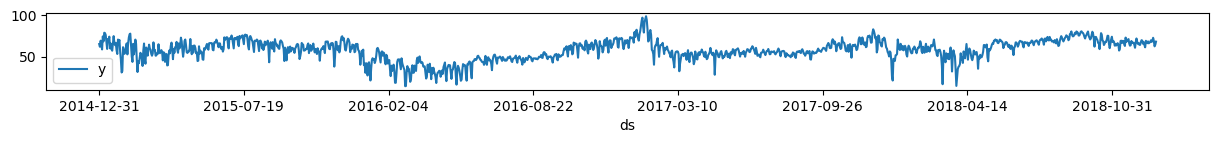

In [3]:
# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 1))

In [4]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

In [5]:
# Create a NeuralProphet model with default parameters
m = NeuralProphet(
    #seasonality_mode="additive", learning_rate=0.01,  # additive multiplicative
    #trend_reg=1,
# Disable change trendpoints
    #n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=True,
    #epochs=20,
    #collect_metrics=["MSE", "MAE", "RMSE"],
    #n_lags=1,
    #quantiles=[0.00, 0.99]
    #n_forecasts=1,
    #n_lags=3, 
    #changepoints_range=0.95
)

In [6]:
# Use static plotly in notebooks
m.set_plotting_backend("matplotlib") # 'plotly', 'plotly-resampler' or 'matplotlib'."

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df, freq="D") # D MS H

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [7]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365) # 365 days # n_historic_predictions  True 365

# Predict the future
forecast = m.predict(df_future)

Predicting: 46it [00:00, ?it/s]

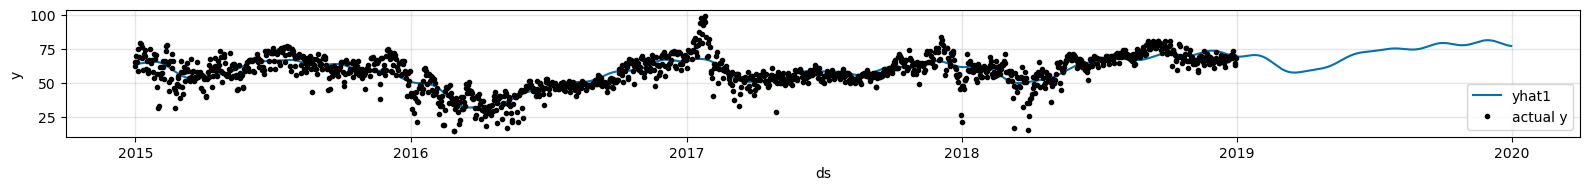

In [8]:
fig_forecast = m.plot(forecast,figsize=(16,2))

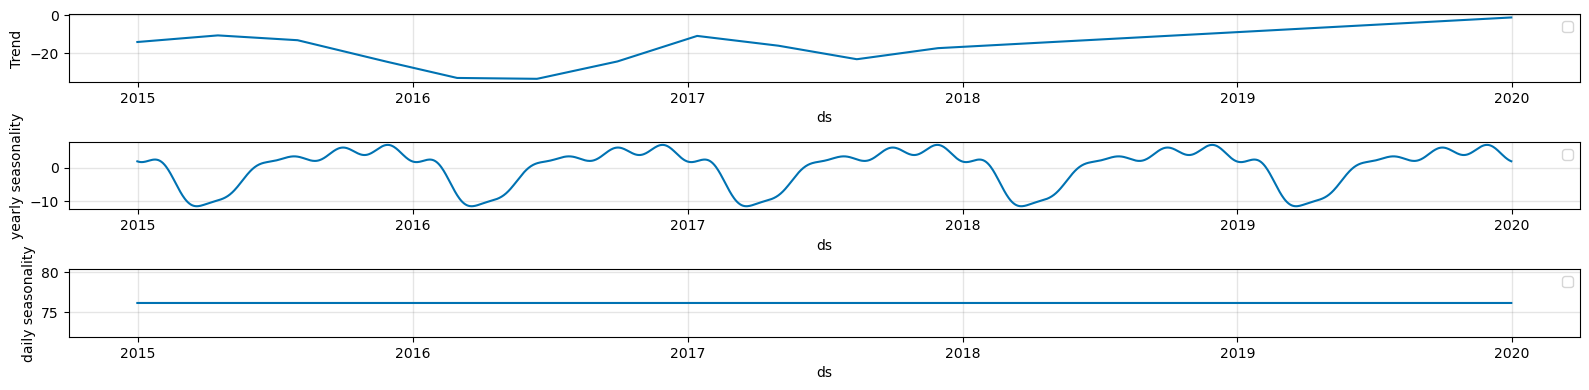

In [9]:
fig_components = m.plot_components(forecast,figsize=(16,4))

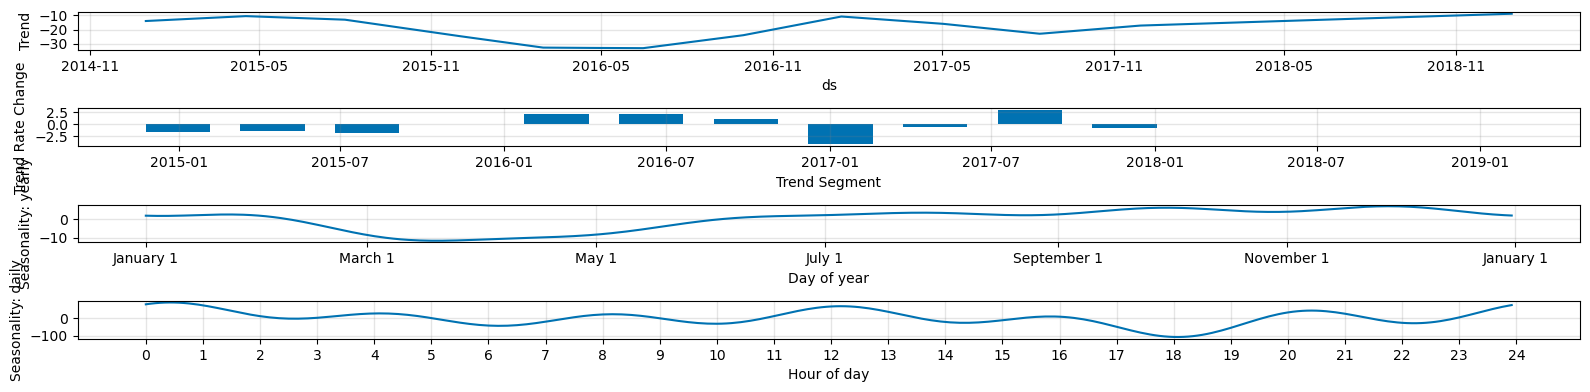

In [10]:
fig_model = m.plot_parameters(figsize=(16,4))